In [1]:
import pandas as pd
import numpy as np
import re

In [91]:
data=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 1\inmuebles_bogota.csv")
data.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [92]:
data=data.rename(columns={"Área":"Area", "Baños": "Banos"})
data.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


## Neighborboods with the major number of ownership

<Axes: title={'center': 'Top 10 Neighborhoods with most ownerships'}>

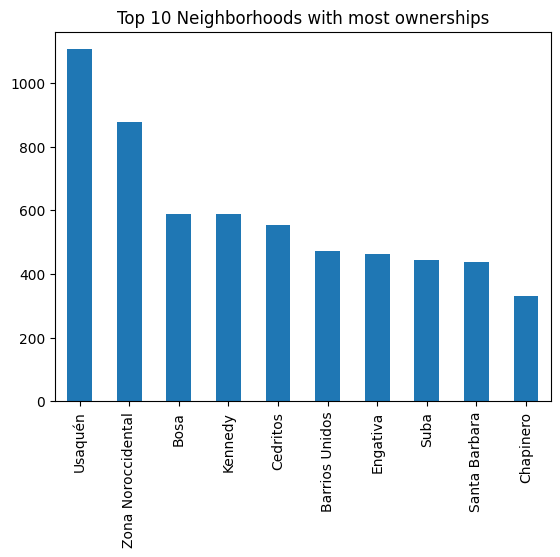

In [265]:
data.Barrio.value_counts().head(10).plot.bar(title="Top 10 Neighborhoods with most ownerships")

## Top 10 mean areas by neighborhood

<Axes: title={'center': 'Top 10 mean areas by neighborhood'}, xlabel='Barrio'>

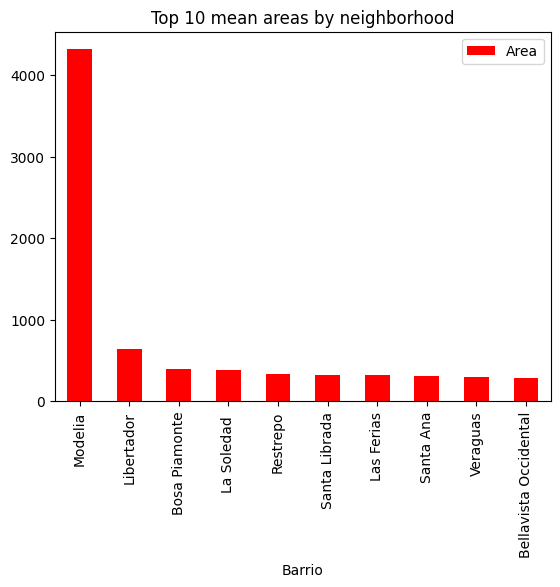

In [271]:
data.groupby("Barrio").aggregate({"Area":np.mean}).sort_values("Area", ascending=False).head(10).plot.bar(title="Top 10 mean areas by neighborhood", color = "red")

<Axes: title={'center': 'Top 10 Most neighborhoods with ownerships for sale'}>

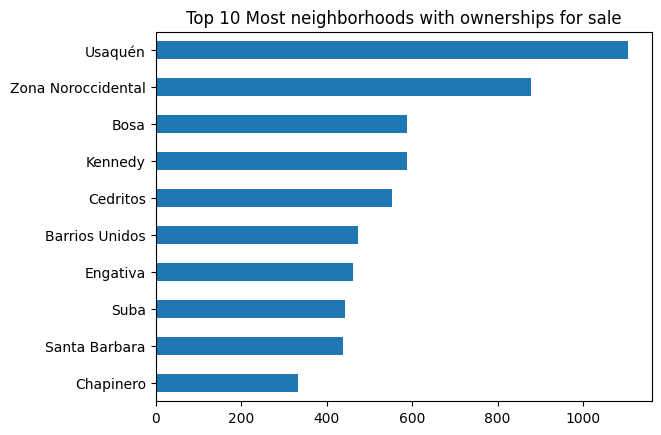

In [336]:
data.Barrio.value_counts(ascending=True).tail(10).plot.barh(title="Top 10 Most neighborhoods with ownerships for sale")

### NEIGHBORHOOD VS COST

NEIGHBORHOOD VS COST IN COLOMBIAN PESOS

<Axes: title={'center': 'Neighborhoods with the highest\n average cost of ownerships'}, ylabel='Colombian pesos'>

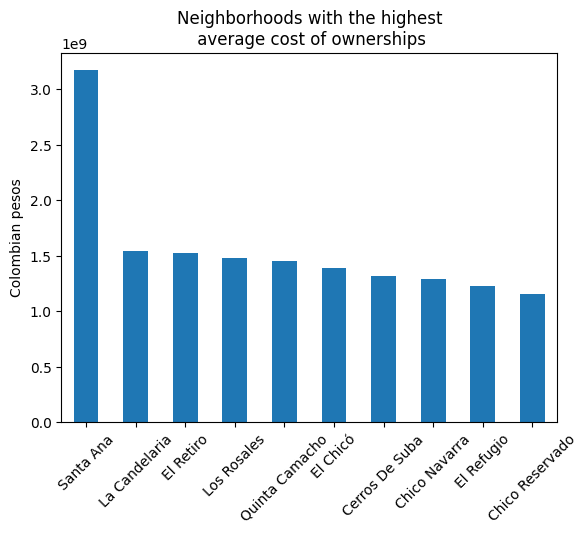

In [345]:
avg_cost_nbh=data.groupby("Barrio").aggregate({
    
    "Valor": [("avg", np.mean)]
    
    }) #Create a df with the mean cost of ownerships by neighborhood

avg_cost_nbh.sort_values(("Valor","avg"), ascending=False, inplace=True) #sort values from the highest to the lowest
avg_cost_nbh.head(10).plot.bar(rot = 45, xlabel = "", ylabel="Colombian pesos",legend = "", title="Neighborhoods with the highest\n average cost of ownerships")





NEIGHBORHOOD VS COST IN USD DOLARS

<Axes: title={'center': 'Neighborhoods with the highest\n average cost of ownerships'}, ylabel='USD'>

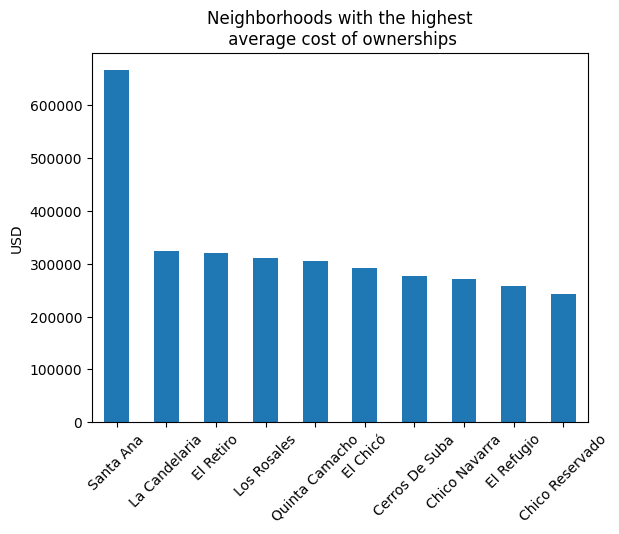

In [344]:
avg_cost_nbh=data.groupby("Barrio").aggregate({
    
    "Valor": [("avg",lambda x: np.mean(x)*0.00021)]
    
    }) #Create a df with the mean cost of ownerships by neighborhood

avg_cost_nbh.sort_values(("Valor","avg"), ascending=False, inplace=True) #sort values from the highest to the lowest
avg_cost_nbh.head(10).plot.bar(rot = 45, xlabel = "", ylabel="USD",legend = "", title="Neighborhoods with the highest\n average cost of ownerships")

## Relation between area and cost

#### First we convert the cost to an int type

In [93]:
for ind, value in enumerate(data.Valor):
    new_value = value.split()[1]
    new_value=new_value.replace(".","")
    data.Valor.iloc[ind]=new_value
    
data.Valor.head()


C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_5932\3016502911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Valor.iloc[ind]=new_value


0     360000000
1     670000000
2    1120000000
3     890000000
4     970000000
Name: Valor, dtype: object

Change the type of the Valor column, from object (string) to int

In [127]:
data.Valor=data.Valor.apply(pd.to_numeric)
data.Valor.head()

0     360000000
1     670000000
2    1120000000
3     890000000
4     970000000
Name: Valor, dtype: int64

In [156]:
barrios=data.groupby("Barrio")
barrios_clas= barrios.aggregate({
    
    "Habitaciones":[("avg",np.mean), ("max",np.max)],
    "Banos": [("avg",np.mean), ("max",np.max)],
    "Area": [("avg",np.mean), ("max",np.max), ("min",np.min)],
    "Valor": [("avg",np.mean), ("max",np.max), ("min",np.min)]
    
}) #This is a df

barrios_clas.head()

Habitaciones         Banos            Area           \
                        avg max       avg max         avg  max min   
Barrio                                                               
Alameda            3.000000   3  2.000000   2   97.000000   97  97   
Alhambra           3.000000   4  2.941176   5  190.411765  360  50   
Andes Norte        3.000000   4  2.857143   3  124.857143  180  42   
Antonio Nariño     4.312500  14  2.500000   6  163.062500  554  32   
Barrancas          2.866667   3  2.133333   3   70.200000   78  63   

                       Valor                         
                         avg         max        min  
Barrio                                               
Alameda         5.800000e+08   580000000  580000000  
Alhambra        7.523529e+08  1400000000  300000000  
Andes Norte     7.095714e+08  1260000000  350000000  
Antonio Nariño  4.592219e+08  1300000000  115000000  
Barrancas       3.141333e+08   455000000  233000000

In [173]:
barrios_clas.sort_values([("Valor","max"),("Area", "max"),("Habitaciones","max")],ascending=False)

Habitaciones         Banos            Area             \
                       avg max       avg max         avg   max  min   
Barrio                                                                
Usaquén           2.813575  12  2.754751   7  134.046154  6364   24   
El Chicó          2.643836   5  3.027397   5  182.191781  1550   45   
La Candelaria     2.968750  10  2.593750   6  173.718750   550   24   
Santa Barbara     2.449772  22  2.652968   7  124.869863  1080   30   
Santa Ana         3.625000   5  4.375000   6  309.375000   674  108   
...                    ...  ..       ...  ..         ...   ...  ...   
Zona Franca       2.000000   2  1.000000   1   54.000000    54   54   
El Tunal          2.000000   2  1.000000   1   41.000000    41   41   
La Estanzuela     3.000000   3  1.000000   1   46.000000    46   46   
Bosa Porvenir     2.000000   2  2.000000   2   42.000000    42   42   
Buenos Aires      3.000000   3  1.000000   1   50.000000    50   50   

                      Valor                          
                        avg          max        min  
Barrio                                               
Usaquén        7.581089e+08  16000000000  120000000  
El Chicó       1.393411e+09  13200000000  260000000  
La Candelaria  1.544228e+09  10451500000   60000000  
Santa Barbara  7.308169e+08   9200000000  170000000  
Santa Ana      3.172500e+09   8800000000  780000000  
...                     ...          ...        ...  
Zona Franca    1.600000e+08    160000000  160000000  
El Tunal       1.600000e+08    160000000  160000000  
La Estanzuela  1.400000e+08    140000000  140000000  
Bosa Porvenir  1.330000e+08    133000000  133000000  
Buenos Aires   1.300000e+08    130000000  130000000  

[149 rows x 10 columns]

#### Then, we create a scatter plot

<Axes: xlabel='Area', ylabel='Valor'>

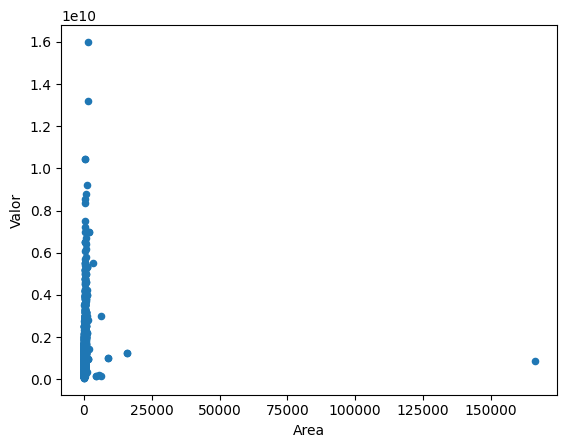

In [348]:
data.plot.scatter(x="Area", y="Valor")

## Número de propiedades en renta y en venta 

In [183]:
rent=0
sell=0
rent_sell=0
for info in data.Descripcion:
    if "renta" in info and "venta" in info:
        rent_sell+=1
    elif "venta" in info:
        sell+=1
    elif "renta" in info:
        rent+=1
print(f"There are {rent} ownership at rent, {sell} at sell, and {rent_sell} at rent or sale")


There are 0 properties at rent, 9513 at sell, and 0 at rent or sale


### Description of the most and less expensive ownership

In [263]:
m_expen=data[data.Valor == data.Valor.max()]
l_expen=data[data.Valor == data.Valor.min()]
print("The most expensive ownership: ")
print(m_expen, "\n\n")
print("The less expensive ownership: ")
print(l_expen)

The most expensive ownership: 
          Tipo                   Descripcion  Habitaciones  Banos  Area  \
5234  Edificio  Edificio en venta en Usaquén            12      7  1664   

       Barrio      UPZ        Valor  
5234  Usaquén  Usaquén  16000000000   


The less expensive ownership: 
                     Tipo                                    Descripcion  \
4847  Oficina/Consultorio  Oficina/Consultorio en venta en La Candelaria   

      Habitaciones  Banos  Area         Barrio            UPZ     Valor  
4847             1      2    24  La Candelaria  La Candelaria  60000000  


## Types of ownerships for sale at Bogota, Colombia

<Axes: title={'center': 'Types of properties for sale in Bogota, Colombia'}>

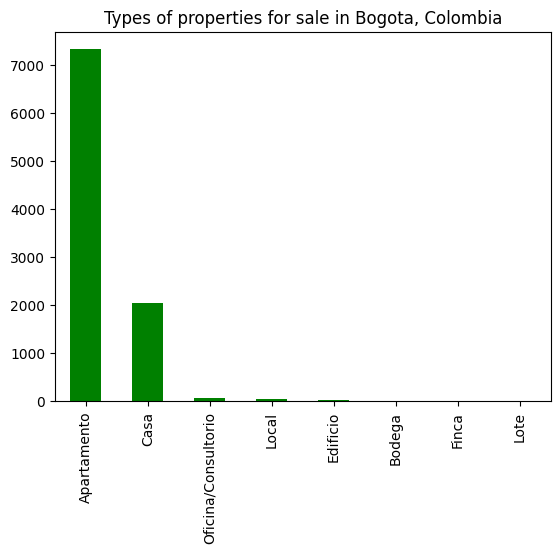

In [233]:
data.Tipo.value_counts().plot.bar(title="Types of ownership for sale in Bogota, Colombia", color = ["Green"])